# Optimization
---

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

## Stochastic Gradient Descent

In [2]:
class SGD:
    """
    stochastic gradient descent
    lr: learning rate hyperparameter
    """
    
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

## How SGD is trapped in local minima

In [3]:
def f(x):
    return x * (x - 1.0) * (x - 2.0) * (x - 4.0)

def df(x):
    return (x - 1.0) * (x - 2.0) * (x - 4.0) + x * (x - 2.0) * (x - 4.0) \
            + x * (x - 1.0) * (x - 4.0) + x * (x - 1.0) * (x - 2.0)

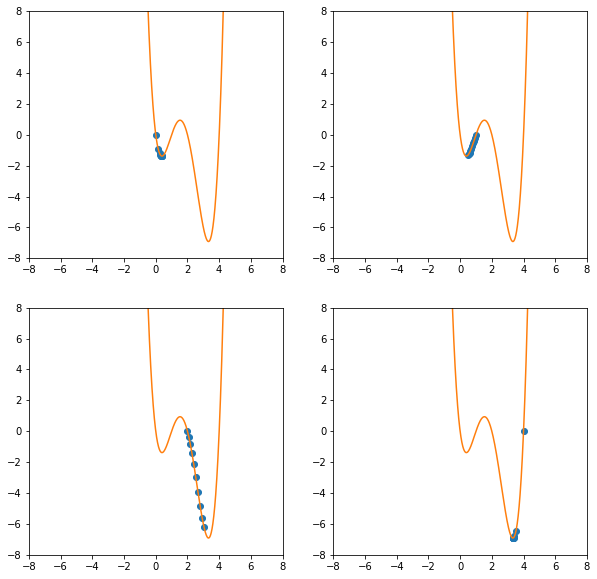

In [4]:
init_position = [0.0, 1.0, 2.0, 4.0]
lr = 0.02
num_steps = 10
idx = 1

plt.figure(figsize = (10, 10))

for init_x in init_position:
    x = init_x # initial weights
    x_history = [] # storing weights trajectory
    
    for i in range(num_steps):
        x_history.append(x)
        x -= lr * df(x)
        
    x = np.arange(-5.0, 5.0, 0.01)
    y = f(x)
    
    plt.subplot(2, 2, idx)
    plt.plot(np.array(x_history), f(np.array(x_history)), 'o')
    plt.plot(x, y)
    plt.ylim(-8, 8)
    plt.xlim(-8, 8)
    idx += 1

## How SGD suffer from oscillating trajectory

Case 1: Circle

In [5]:
def f_2(x, y):
    return x**2 + y**2

def df_2(x, y):
    return 2.0 * x, 2.0 * y

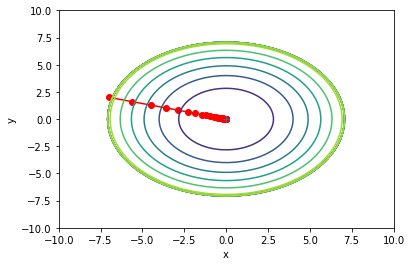

In [6]:
# optimizer
optimizer = SGD(lr = 0.1)

# settings
init_pos = (-7.0, 2.0)
params = {}
grads = {}
grads['x'], grads['y'] = 0, 0
params['x'], params['y'] = init_pos[0], init_pos[1]
x_history_2 = []
y_history_2 = []

for i in range(30):
    x_history_2.append(params['x'])
    y_history_2.append(params['y'])
    
    grads['x'], grads['y'] = df_2(params['x'], params['y'])
    optimizer.update(params, grads)
    
x = np.arange(-10, 10, 0.01)
y = np.arange(-10, 10, 0.01)

X, Y = np.meshgrid(x, y)
Z = f_2(X, Y)

# simplifying lines
mask = Z > 50
Z[mask] = 0

# graph
plt.plot(x_history_2, y_history_2, 'o-', color = 'red')
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Case 2: Ellipse
- The existence of ravines (areas where the surface curves much more steeply in one dimension than in others) generates oscillations.

In [7]:
def f_3(x, y):
    return x**2 / 20.0 + y**2

def df_3(x, y):
    return x / 10.0, 2.0 * y

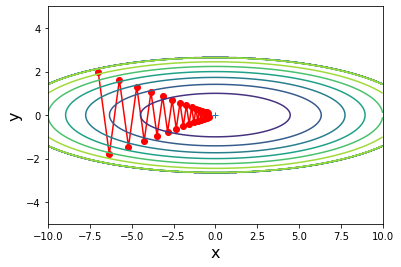

In [8]:
# optimizer
optimizer = SGD(lr = 0.95) # To show the problem clearly,
                           # insert an excessively high lr.

# settings
init_pos = (-7.0, 2.0)
params = {}
grads = {}
grads['x'], grads['y'] = 0, 0
params['x'], params['y'] = init_pos[0], init_pos[1]
x_history_3 = []
y_history_3 = []

for i in range(30):
    x_history_3.append(params['x'])
    y_history_3.append(params['y'])
    
    grads['x'], grads['y'] = df_3(params['x'], params['y'])
    optimizer.update(params, grads)
    
x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y)
Z = f_3(X, Y)

# simplifying lines
mask = Z > 7
Z[mask] = 0

# graph
plt.plot(x_history_3, y_history_3, 'o-', color = 'red')
plt.contour(X, Y, Z)
plt.ylim(-5, 5)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
plt.xlabel('x', size = 16)
plt.ylabel('y', size = 16)
plt.show()

## Momentum Optimizer

Momentum Optimizer
$$v_n = \alpha v_{n-1} - \eta \nabla f(x_n)$$
$$v_{-1}=0$$
$$x_{n+1}=x_n+v_n$$

In [9]:
class Momentum:
    """
    Momentum SGD
    lr: learning rate hyperparameter (eta in the above)
    momentum: momentum hyperparameter (alpha in the above)
    """
    
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                # initial momentum -> 0
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

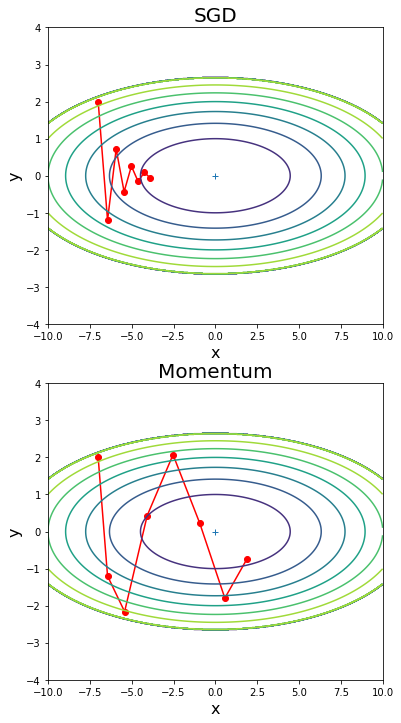

In [10]:
# optimizer
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr = 0.8) # To show the problem clearly,
                                  # insert an excessively high lr.
optimizers["Momentum"] = Momentum(lr = 0.8)

idx = 1

# settings
init_pos = (-7.0, 2.0)
params = {}
grads = {}
grads['x'], grads['y'] = 0, 0
params['x'], params['y'] = init_pos[0], init_pos[1]

plt.figure(figsize = (6, 12))

for key in optimizers:
    optimizer = optimizers[key]
    x_history_4 = []
    y_history_4 = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(8):
        x_history_4.append(params['x'])
        y_history_4.append(params['y'])
        
        grads['x'], grads['y'] = df_3(params['x'], params['y'])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y)
    Z = f_3(X, Y)
    
    # simplifying lines
    mask = Z > 7
    Z[mask] = 0
    
    # graphs
    plt.subplot(2, 1, idx)
    idx += 1
    plt.plot(x_history_4, y_history_4, 'o-', color = 'red')
    plt.contour(X, Y, Z)
    plt.ylim(-4, 4)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key, size = 20)
    plt.xlabel('x', size = 16)
    plt.ylabel('y', size = 16)
    
plt.show()

Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)
$$v_n = \alpha v_{n-1} - \eta \nabla f(x_n + \alpha v_{n-1})$$
$$v_{-1}=0$$
$$x_{n+1}=x_n+v_n$$

Bengio's approximation
$$x_{n+1}'=x_{n}'-\eta \nabla f(x_{n}')+\alpha v_n$$
$$=x_{n}'-\eta \nabla f(x_{n}') + \alpha (\alpha v_{n-1} - \eta \nabla f(x_{n}'))$$
$$=x_{n}'-(1+\alpha ) \eta \nabla f(x_{n} ) + \alpha ^2 v_{n-1}$$
$$v_n = \alpha v_{n-1} - \eta \nabla f(x_n)$$
$$v_{-1}=0$$
$$x_{0}'=x_0$$

In [11]:
class Nesterov:
    """
    Nesterov's Accelerated Gradient
    More aggressive than Momentum optimizer
    However, the backpropagation process needs to be modified
    to implement NAG. See the formula, f, above.
    This is the reason why it can hardly be applied to deep learning.
    Instead, we can use Bengio's approximation like below.
    lr: learning rate hyperparameter (eta in the above)
    momentum: momentum hyperparameter (alpha in the above)
    """
    
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]

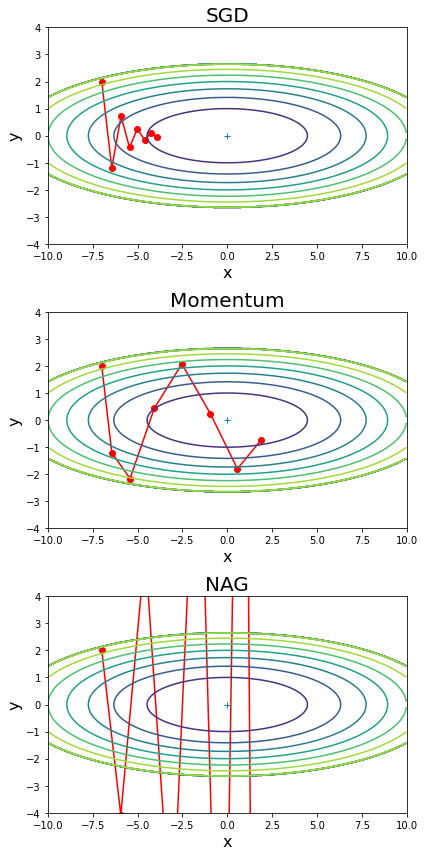

In [12]:
# optimizer
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr = 0.8) # To show the problem clearly,
                                  # insert an excessively high lr.
optimizers["Momentum"] = Momentum(lr = 0.8)
optimizers["NAG"] = Nesterov(lr = 0.8)

idx = 1

# settings
init_pos = (-7.0, 2.0)
params = {}
grads = {}
grads['x'], grads['y'] = 0, 0
params['x'], params['y'] = init_pos[0], init_pos[1]

plt.figure(figsize = (6, 12))

for key in optimizers:
    optimizer = optimizers[key]
    x_history_5 = []
    y_history_5 = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(8):
        x_history_5.append(params['x'])
        y_history_5.append(params['y'])
        
        grads['x'], grads['y'] = df_3(params['x'], params['y'])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y)
    Z = f_3(X, Y)
    
    # simplifying lines
    mask = Z > 7
    Z[mask] = 0
    
    # graphs
    plt.subplot(3, 1, idx)
    idx += 1
    plt.plot(x_history_5, y_history_5, 'o-', color = 'red')
    plt.contour(X, Y, Z)
    plt.ylim(-4, 4)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key, size = 20)
    plt.xlabel('x', size = 16)
    plt.ylabel('y', size = 16)
    
plt.tight_layout()
plt.show()

## AdaGrad Optimizer (Adaptive Gradient)

AdaGrad
$$h_n=h_{n-1}+ \nabla f(x_n) \odot \nabla f(x_n)$$
$$h_{-1}=0$$
Thus,
$$h_n=\sum_{k=0}^{n} \nabla f(x_k) \odot \nabla f(x_k)$$
$$x_{n+1}=x_n-\eta \frac{1}{\sqrt{h_n}} \odot \nabla f(x_n)$$
It can be seen that the learning rate is
$$\eta \frac{1}{\sqrt{h_n}}$$
It is based on the assumption that variables that have undergone large changes are already close to optimal, and variables that have undergone small changes are still far from optimal. Therefore, as variables are closer to optimal, their learning rates need to be decreased.

In [13]:
class AdaGrad:
    """
    AdaGrad Optimizer
    lr: a learning rate component (eta in the above)
    self.h: inversely related to lr
    """
    def __init__(self, lr = 0.01):
        self.lr = lr # eta in the above
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key] # Hadamard product
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key] + 1e-7))

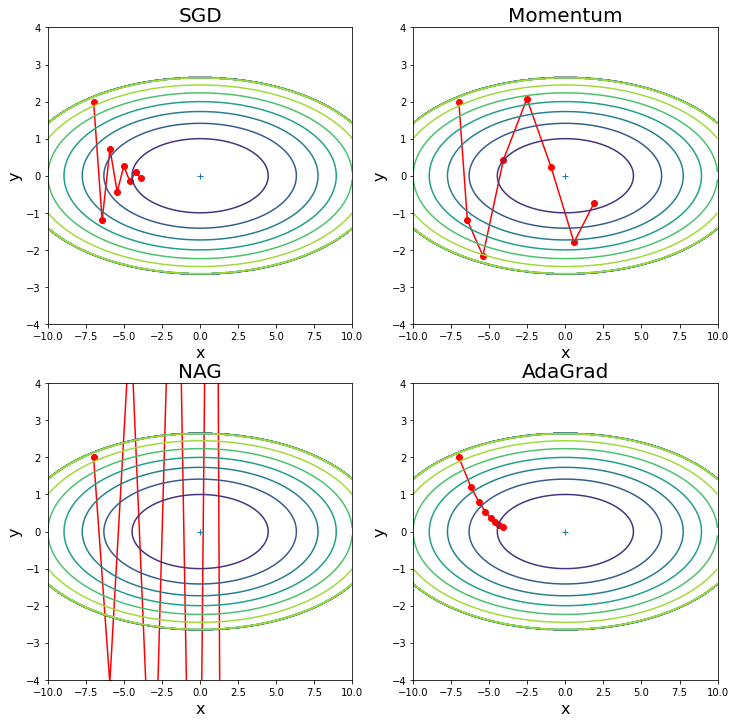

In [14]:
# optimizer
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr = 0.8) # To show the problem clearly,
                                  # insert an excessively high lr.
optimizers["Momentum"] = Momentum(lr = 0.8)
optimizers["NAG"] = Nesterov(lr = 0.8)
optimizers["AdaGrad"] = AdaGrad(lr = 0.8)

idx = 1

# settings
init_pos = (-7.0, 2.0)
params = {}
grads = {}
grads['x'], grads['y'] = 0, 0
params['x'], params['y'] = init_pos[0], init_pos[1]

plt.figure(figsize = (12, 12))

for key in optimizers:
    optimizer = optimizers[key]
    x_history_6 = []
    y_history_6 = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(8):
        x_history_6.append(params['x'])
        y_history_6.append(params['y'])
        
        grads['x'], grads['y'] = df_3(params['x'], params['y'])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y)
    Z = f_3(X, Y)
    
    # simplifying lines
    mask = Z > 7
    Z[mask] = 0
    
    # graphs
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history_6, y_history_6, 'o-', color = 'red')
    plt.contour(X, Y, Z)
    plt.ylim(-4, 4)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key, size = 20)
    plt.xlabel('x', size = 16)
    plt.ylabel('y', size = 16)
    
plt.show()

Initially, AdaGrad Optimizer moves quickly thanks to relatively higher learning rates in the earlier steps. However, it slows down due to decreasing learning rates. In the end, it is overtaken by other optimizers.

## RMSProp Optimizer

RMSProp takes the problem just above into account by introducing a parameter (decaying rate or forgetting factor), gamma.
<br>
<br>
RMSProp (Root Mean Square Propagation)
$$h_n=\gamma h_{n-1} + (1-\gamma) \nabla f(x_n) \odot \nabla f(x_n)$$
$$h_{-1}=0$$
$$x_{n+1}=x_n- \eta \frac{1}{\sqrt{h_n}} \nabla f(x_n)$$

In [15]:
class RMSProp:
    """
    RMSProp Optimizer
    lr: learning rate hyperparameter (eta in the above)
    gamma: decaying rate hyperparameter (gamma in the above)
    """
    def __init__(self, lr = 0.01, gamma = 0.99):
        self.lr = lr
        self.gamma = gamma
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] = self.gamma * self.h[key] \
            + (1- self.gamma) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key] + 1e-7))

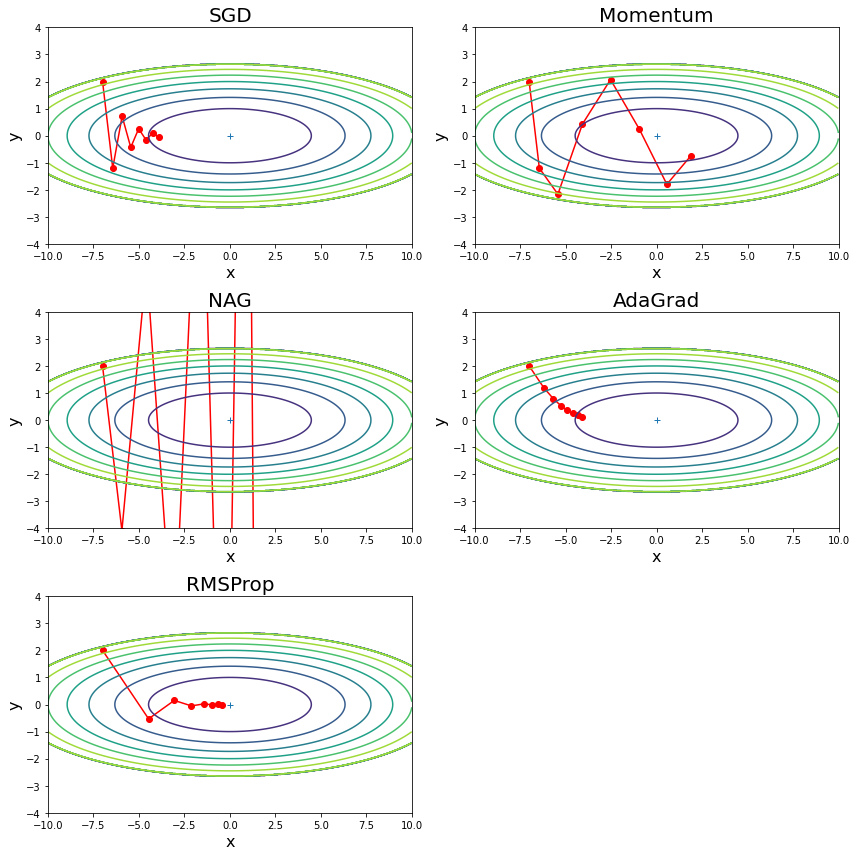

In [16]:
# optimizer
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr = 0.8) # To show the problem clearly,
                                  # insert an excessively high lr.
optimizers["Momentum"] = Momentum(lr = 0.8)
optimizers["NAG"] = Nesterov(lr = 0.8)
optimizers["AdaGrad"] = AdaGrad(lr = 0.8)
optimizers["RMSProp"] = RMSProp(lr = 0.8, gamma = 0.9)

idx = 1

# settings
init_pos = (-7.0, 2.0)
params = {}
grads = {}
grads['x'], grads['y'] = 0, 0
params['x'], params['y'] = init_pos[0], init_pos[1]

plt.figure(figsize = (12, 12))

for key in optimizers:
    optimizer = optimizers[key]
    x_history_7 = []
    y_history_7 = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(8):
        x_history_7.append(params['x'])
        y_history_7.append(params['y'])
        
        grads['x'], grads['y'] = df_3(params['x'], params['y'])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y)
    Z = f_3(X, Y)
    
    # simplifying lines
    mask = Z > 7
    Z[mask] = 0
    
    # graphs
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history_7, y_history_7, 'o-', color = 'red')
    plt.contour(X, Y, Z)
    plt.ylim(-4, 4)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key, size = 20)
    plt.xlabel('x', size = 16)
    plt.ylabel('y', size = 16)
    
plt.tight_layout()
plt.show()

## Adam Optimizer

Adam Optimizer: Momentum + RMSProp
<br>
<br>
Adam
$$x_{n+1}=x_n-\eta \frac{1}{\sqrt{\hat{v}_n}} \odot \hat{m}_n$$
<br>
Momentum Part
$$m_n=\beta_1 m_{n-1}+(1-\beta_1) \nabla f(x_n)$$
$$m_{-1}=0$$
<br>
RMSProp part
$$v_n=\beta_2 v_{n-1} + (1-\beta_2) \nabla f(x_n) \odot \nabla f(x_n)$$
$$v_{-1}=0$$
Since $m_{-1}=0$ and $v_{-1}=0$, biases (too close to zero) would occur if $\beta_1$ and $\beta_2$ are close to 1.
Therefore, let $\hat{m}_{-1}=0$ and $\hat{v}_{-1}=0$ be the following values.
$$\hat{m}_{n}=\frac{m_{n}}{1-\beta_{1}^{n+1}}$$
$$\hat{v}_{n}=\frac{v_{n}}{1-\beta_{2}^{n+1}}$$

In [17]:
class Adam:
    """
    Adam Optimizer
    lr: a learning rate component (eta in the above)
    beta1: a hyperparameter for the Momentum Part
    beta2: a hyperparameter for the RMSProp Part (varying learning rate)
    """
    
    def __init__(self, lr = 0.001, beta1 = 0.9, beta2 = 0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        self.iter += 1
        # modified learning rate (to replace m and v with m_hat and v_hat)
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / \
            (1.0 - self.beta1**self.iter)
        for key in params.keys():
            # Update the Momentum hyperparameter.
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            # Update the RMSProp hyperparameter.
            # Hadamard product can be easily implemented via NumPy operations.
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

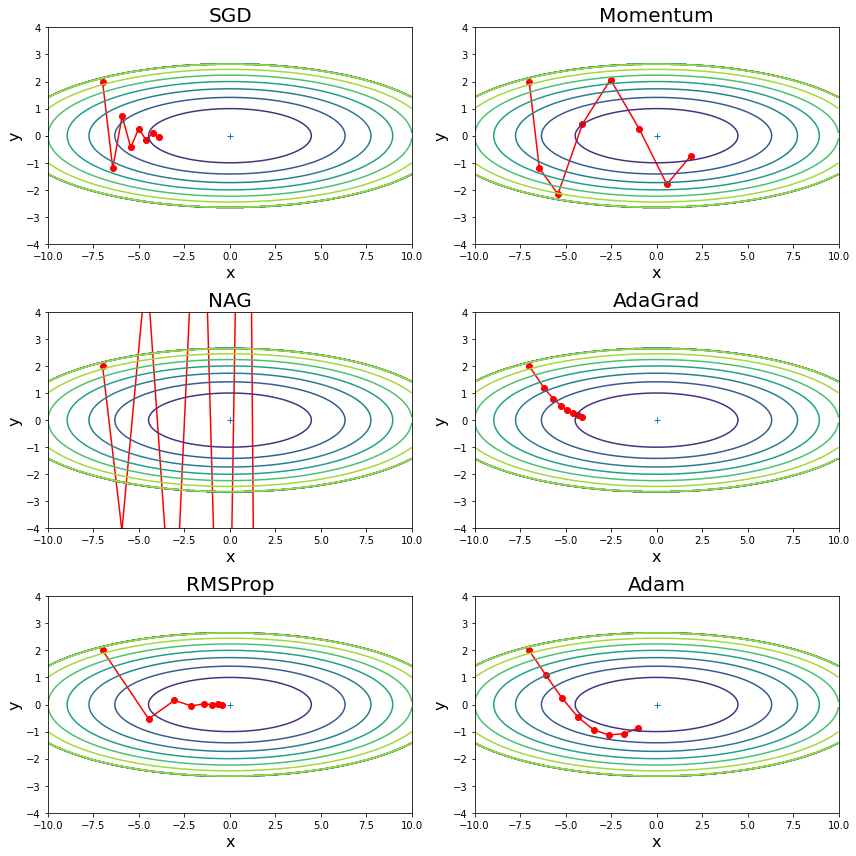

In [18]:
# optimizer
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr = 0.8) # To show the problem clearly,
                                  # insert an excessively high lr.
optimizers["Momentum"] = Momentum(lr = 0.8)
optimizers["NAG"] = Nesterov(lr = 0.8)
optimizers["AdaGrad"] = AdaGrad(lr = 0.8)
optimizers["RMSProp"] = RMSProp(lr = 0.8, gamma = 0.9)
optimizers["Adam"] = Adam(lr = 0.9)

idx = 1

# settings
init_pos = (-7.0, 2.0)
params = {}
grads = {}
grads['x'], grads['y'] = 0, 0
params['x'], params['y'] = init_pos[0], init_pos[1]

plt.figure(figsize = (12, 12))

for key in optimizers:
    optimizer = optimizers[key]
    x_history_8 = []
    y_history_8 = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(8):
        x_history_8.append(params['x'])
        y_history_8.append(params['y'])
        
        grads['x'], grads['y'] = df_3(params['x'], params['y'])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y)
    Z = f_3(X, Y)
    
    # simplifying lines
    mask = Z > 7
    Z[mask] = 0
    
    # graphs
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history_8, y_history_8, 'o-', color = 'red')
    plt.contour(X, Y, Z)
    plt.ylim(-4, 4)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key, size = 20)
    plt.xlabel('x', size = 16)
    plt.ylabel('y', size = 16)
    
plt.tight_layout()
plt.show()

## Optimizer Benchmarks

In [22]:
import tensorflow as tf

In [19]:
def f_4(x, y):
    return x**2 / 20.0 + y**2

def df_4(x, y):
    return x / 10.0 + 2.0 * y

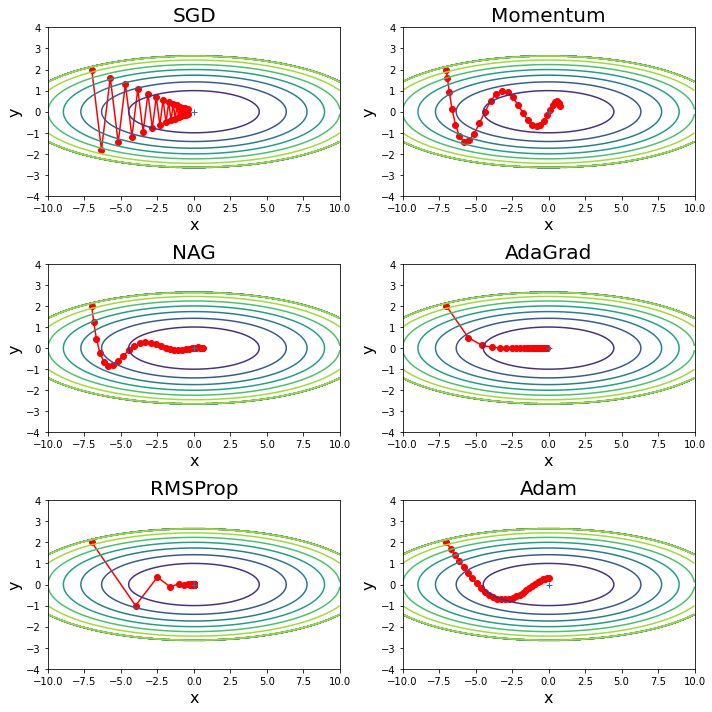

In [21]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr = 0.95)
optimizers["Momentum"] = Momentum(lr = 0.1)
optimizers["NAG"] = Nesterov(lr = 0.1)
optimizers["AdaGrad"] = AdaGrad(lr = 1.5)
optimizers["RMSProp"] = RMSProp(lr = 0.3)
optimizers["Adam"] = Adam(lr = 0.3)

idx = 1

plt.figure(figsize = (10, 10))

for key in optimizers:
    optimizer = optimizers[key]
    x_history_9 = []
    y_history_9 = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history_9.append(params['x'])
        y_history_9.append(params['y'])
        
        grads['x'], grads['y'] = df_3(params['x'], params['y'])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-10, 10, 0.01)
    
    X, Y = np.meshgrid(x, y)
    Z = f_3(X, Y)
    
    # simplifying lines
    mask = Z > 7
    Z[mask] = 0
    
    # graphs
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history_9, y_history_9, 'o-', color = 'red')
    plt.contour(X, Y, Z)
    plt.ylim(-4, 4)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key, size = 20)
    plt.xlabel('x', size = 16)
    plt.ylabel('y', size = 16)
    
plt.tight_layout()
plt.show()

In [28]:
tf.test.is_gpu_available(
    cuda_only = False, min_cuda_compute_capability = None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [29]:
gpu_available = tf.test.is_gpu_available()
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only = True)
is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3, 0))

In [30]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()                       # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return self.dense5(h)

In [32]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

In [42]:
EPOCHS = 50
optimizer_dict = {"SGD": "o", "Adagrad": "x", "RMSProp": "s", "Adam": "D"}
loss_list = {}

for key in optimizer_dict.keys():
    model = MyModel()
    model.compile(optimizer = key,
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    history = model.fit(train_ds, validation_data = test_ds, epochs = EPOCHS)
    loss_list[key] = history.history['loss']

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8441 - accuracy: 0.7042 - val_loss: 0.6588 - val_accuracy: 0.7603
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5072 - accuracy: 0.8213 - val_loss: 0.5095 - val_accuracy: 0.8129
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4513 - accuracy: 0.8397 - val_loss: 0.4556 - val_accuracy: 0.8371
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4164 - accuracy: 0.8517 - val_loss: 0.4275 - val_accuracy: 0.8475
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3948 - accuracy: 0.8583 - val_loss: 0.4185 - val_accuracy: 0.8506
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3760 - accuracy: 0.8647 - val_loss: 0.4123 - val_accuracy: 0.8506
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3609 - accuracy: 0.8689 - val_loss: 0.4028 - val_accuracy:

1875/1875 [==============================] - 17s 9ms/step - loss: 0.3753 - accuracy: 0.8799 - val_loss: 0.5157 - val_accuracy: 0.8698
Epoch 14/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3769 - accuracy: 0.8805 - val_loss: 0.5857 - val_accuracy: 0.8627
Epoch 15/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3768 - accuracy: 0.8799 - val_loss: 0.5464 - val_accuracy: 0.8563
Epoch 16/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3747 - accuracy: 0.8806 - val_loss: 0.6019 - val_accuracy: 0.8535
Epoch 17/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3886 - accuracy: 0.8808 - val_loss: 0.7930 - val_accuracy: 0.8426
Epoch 18/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3895 - accuracy: 0.8837 - val_loss: 0.5957 - val_accuracy: 0.8622
Epoch 19/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3832 - accuracy: 0.8819 - val_loss: 0.7917 - val_accurac

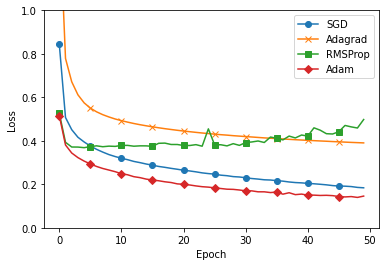

In [49]:
x = np.arange(EPOCHS)
for key, val in optimizer_dict.items():
    plt.plot(x, loss_list[key], marker = optimizer_dict[key],
            markevery = 5, label = key)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 1)
plt.legend()
plt.show()